## Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/13/20 at 430 MST/ 630EST
* Instructor name: James Irving
* Blog post URL:


In [21]:
jupyter labextension install @jupyterlab/toc

SyntaxError: invalid syntax (<ipython-input-21-2c1e2776b58d>, line 1)

Import relevant features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
sns.set_style('darkgrid')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Load up the data

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

After loading libraries and data, time to do some quick data exploration before cleaning

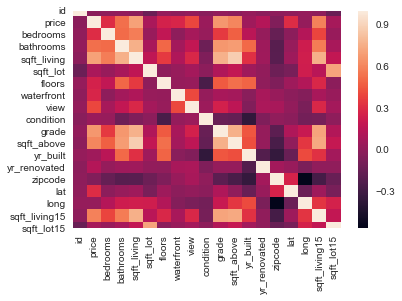

In [5]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping columns that showed little correllation and from the column descriptions only seemed moderately useful. Date sold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [7]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [9]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [10]:
data['waterfront'] = data['waterfront'].fillna(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Similarly, SqFt Basement needs to be cast as a float and I will assume a lack of data suggests no basement square-footage.

In [12]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [13]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [15]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [16]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

In [17]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [18]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
data['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

Let's normalize all non-categorical data.

In [20]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    data[feat] = norm_feat(data[feat])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966e+05,-2.303005e-16,1.158082e-16,-1.421283e-16,1.579203e-17,-1.473923e-16,0.006760,3.409825,7.657915,3.158406e-17,-2.895206e-17,2.674117e-15,-2.632005e-18,98077.951845,-1.768913e-14,-9.058046e-15,1.368643e-16,1.842404e-17
std,3.673681e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.081944,0.650546,1.173200,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.513072,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.562024e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,0.000000,1.000000,3.000000,-1.713778e+00,-6.496219e-01,-2.416991e+00,-1.888767e-01,98001.000000,-2.917271e+00,-2.167495e+00,-2.316914e+00,-4.439058e-01
25%,3.220000e+05,-4.028937e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,0.000000,3.000000,7.000000,-7.231529e-01,-6.496219e-01,-6.808346e-01,-1.888767e-01,98033.000000,-6.423086e-01,-8.102234e-01,-7.247493e-01,-2.807861e-01
50%,4.500000e+05,-4.028937e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,0.000000,3.000000,7.000000,-2.761633e-01,-6.496219e-01,1.361802e-01,-1.888767e-01,98065.000000,8.449553e-02,-1.209286e-01,-2.139723e-01,-1.883919e-01
75%,6.450000e+05,6.766715e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,0.000000,4.000000,8.000000,5.090887e-01,6.008902e-01,8.851104e-01,-1.888767e-01,98118.000000,8.509960e-01,6.323214e-01,5.448965e-01,-9.808756e-02
max,7.700000e+06,3.198406e+01,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,1.000000,5.000000,13.000000,9.207265e+00,1.030941e+01,1.497871e+00,5.346267e+00,98199.000000,1.569861e+00,6.388288e+00,6.163444e+00,3.147422e+01


Looking for catagorical variables to one-hot encode:
Looks like, waterfront, condition, (likely grade), and zipcode (may be more usefull to categorize rather than just make 70 dummy variables). Though floors also has very few unique values I still think in general, that this will be a linear feature. After identifying categorical variables the next step is to one-hot encode and make sure to drop the first column from each feature to prevent multicolinearity.

Taking categorical variables and changing them to category type before one-hot encoding.

In [21]:
cat_feats = ['condition', 'grade', 'zipcode']
cat_feats_df = data[cat_feats]
cat_feats_df = cat_feats_df.astype('category')
cat_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
condition    21597 non-null category
grade        21597 non-null category
zipcode      21597 non-null category
dtypes: category(3)
memory usage: 67.0 KB


Now creating dummy variables and dropping the first column to ensure no dummy variable trap.

In [22]:
cat_feats_df = pd.get_dummies(cat_feats_df, drop_first=True)
cat_feats_df.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = data.drop(['condition', 'grade', 'zipcode'], axis=1)
data= pd.concat([data, cat_feats_df], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,0.0,-0.735234,-0.649622,-0.544665,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,0.0,0.460766,0.259841,-0.680835,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,0.0,-1.230546,-0.649622,-1.293596,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,0.0,-0.892284,1.419407,-0.204243,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,0.0,-0.131194,-0.649622,0.544688,...,0,0,0,0,0,0,0,0,0,0


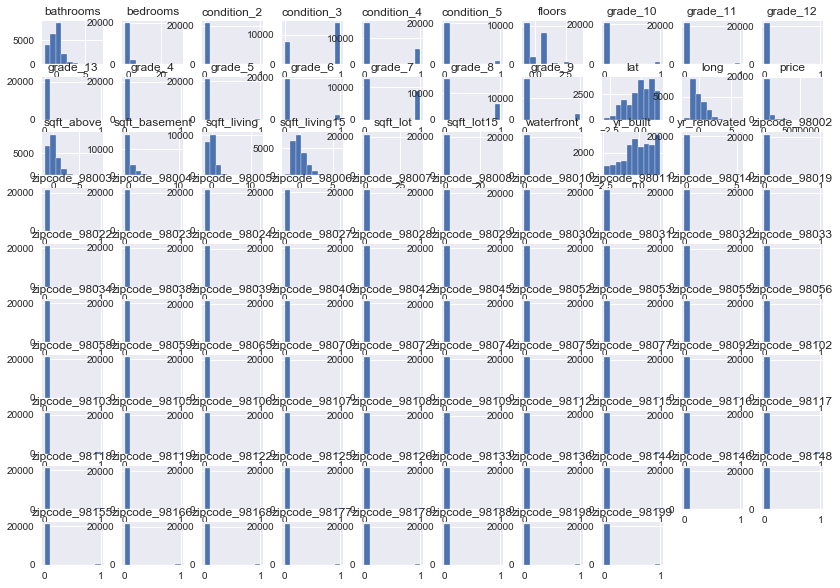

In [24]:
data.hist(figsize = (14,10))
plt.show()


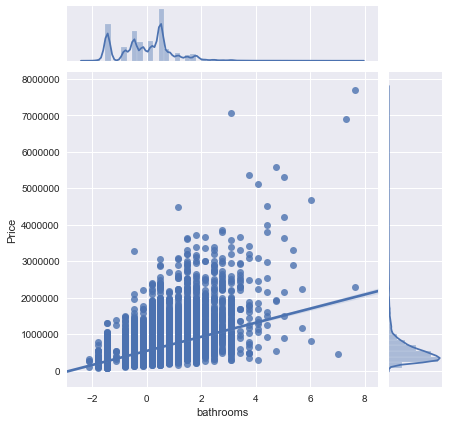

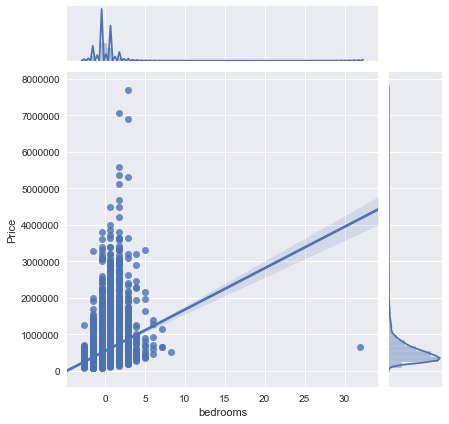

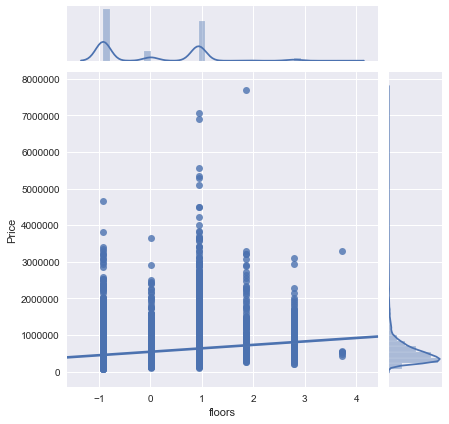

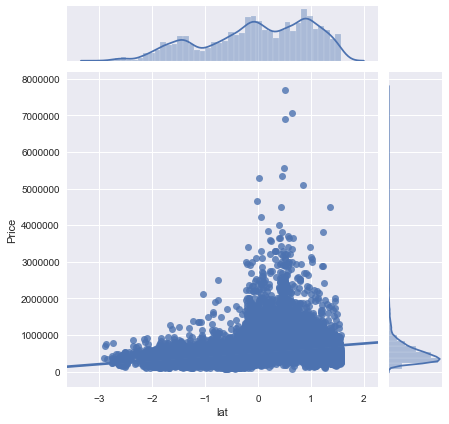

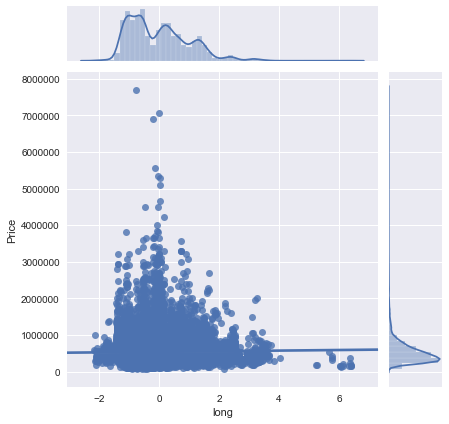

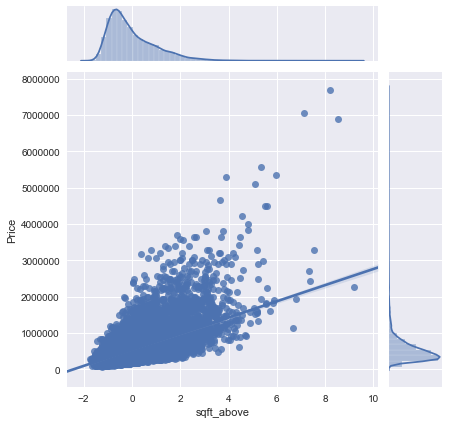

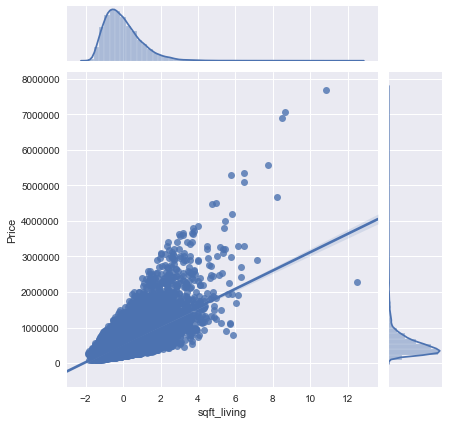

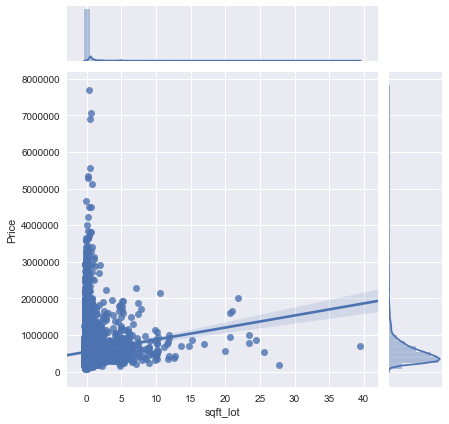

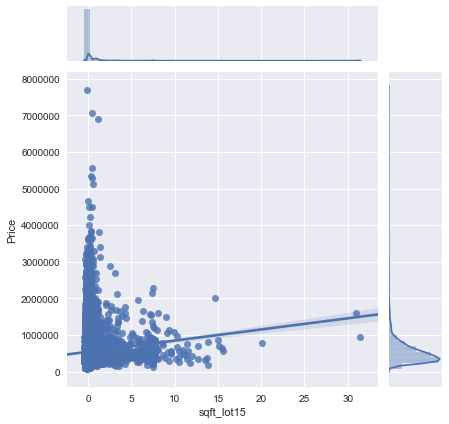

In [25]:
relcols = ['bathrooms', 'bedrooms', 'floors', 'lat', 'long', 'sqft_above', 'sqft_living',
          'sqft_lot', 'sqft_lot15']

for col in relcols:
    sns.jointplot(x = data[col], y = data['price'], data = data, kind = 'reg')
    plt.ylabel('Price')
    plt.show()
#investigating linearity of data


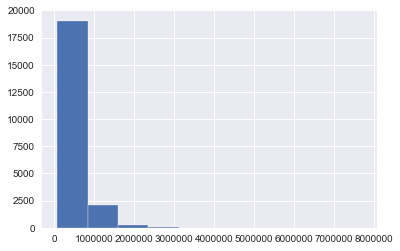

In [27]:
#checking into target variable

data['price'].hist()
plt.show()

Now ready to remove the outcome (price) and train the model by splitting out train/test data points.

In [28]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [29]:
train, test = train_test_split(data)

In [30]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
21574,1220000.0,0.676671,1.800003,3.082082,-0.136562,0.010939,0.0,1.596361,3.442963,1.225533,...,0,0,0,0,0,0,0,0,0,0
6411,722500.0,0.676671,1.800003,0.566033,-0.241458,0.937409,0.0,0.037938,1.123832,1.089364,...,0,0,0,0,0,0,0,0,0,0
13832,430000.0,-0.402894,-1.451039,-0.566734,-0.238440,0.010939,0.0,-0.638587,0.032476,-1.497849,...,0,0,0,0,0,0,0,0,0,0
14101,275000.0,-1.482459,0.499586,-0.806358,-0.219846,0.937409,0.0,-0.541941,-0.649622,0.612772,...,0,0,0,0,0,0,0,0,0,0
7948,299950.0,0.676671,0.174482,-0.294434,-0.181066,-0.915531,0.0,-0.856042,1.010149,0.510645,...,0,0,0,0,0,0,0,0,0,0


In [31]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     818.6
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:00:43   Log-Likelihood:            -2.1625e+05
No. Observations:               16197   AIC:                         4.327e+05
Df Residuals:                   16099   BIC:                         4.334e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.311e+05   1.58e+05      2.100      0.036    2.21e+04     6.4e+05
bedrooms       -1.43e+04   1658.977     -8.617      0.000   -1.75e+04    -1.1e+04
bathrooms      2.256e+04   2220.685     10.159      0.000    1.82e+04    2.69e+04
sqft_living    7.462e+04    1.5e+04      4.990      0.000    4.53e+04    1.04e+05
sqft_lot       1.126e+04   1855.929      6.067      0.000    7621.728    1.49e+04
floors          -1.4e+04   1894.194     -7.392      0.000   -1.77e+04   -1.03e+04
waterfront     8.179e+05   1.52e+04     53.957      0.000    7.88e+05    8.48e+05
sqft_above       6.9e+04   1.35e+04      5.107      0.000    4.25e+04    9.55e+04
sqft_basement  2.145e+04   7099.610      3.022      0.003    7537.893    3.54e+04
yr_built       -1.44e+04   2102.479     -6.850      0.000   -1.85e+04   -1.03e+04
yr_renovated   1.167e+04   1284.879      9.083      0.000    9151.733    1.42e+04
lat            1.584e+04   9644.790      1.642      0.101   -3069.048    3.47e+04
long          -3.509e+04   7144.038     -4.912      0.000   -4.91e+04   -2.11e+04
sqft_living15  1.903e+04   2167.831      8.780      0.000    1.48e+04    2.33e+04
sqft_lot15    -3390.3990   1807.203     -1.876      0.061   -6932.717     151.919
condition_2     8.36e+04   3.41e+04      2.454      0.014    1.68e+04     1.5e+05
condition_3    9.593e+04   3.16e+04      3.033      0.002    3.39e+04    1.58e+05
condition_4     1.22e+05   3.16e+04      3.855      0.000       6e+04    1.84e+05
condition_5    1.646e+05   3.19e+04      5.166      0.000    1.02e+05    2.27e+05
grade_4       -9.368e+04   1.57e+05     -0.597      0.550   -4.01e+05    2.14e+05
grade_5       -1.171e+05   1.53e+05     -0.763      0.445   -4.18e+05    1.84e+05
grade_6       -1.246e+05   1.53e+05     -0.814      0.416   -4.25e+05    1.76e+05
grade_7       -1.194e+05   1.53e+05     -0.780      0.436   -4.19e+05    1.81e+05
grade_8       -9.245e+04   1.53e+05     -0.604      0.546   -3.93e+05    2.08e+05
grade_9       -1.405e+04   1.53e+05     -0.092      0.927   -3.14e+05    2.86e+05
grade_10        1.26e+05   1.53e+05      0.821      0.412   -1.75e+05    4.27e+05
grade_11       2.992e+05   1.54e+05      1.947      0.052   -2016.971       6e+05
grade_12        8.16e+05   1.55e+05      5.270      0.000    5.13e+05    1.12e+06
grade_13       2.028e+06   1.61e+05     12.606      0.000    1.71e+06    2.34e+06
zipcode_98002   1.24e+04   1.57e+04      0.792      0.429   -1.83e+04    4.31e+04
zipcode_98003 -1.581e+04    1.4e+04     -1.129      0.259   -4.33e+04    1.16e+04
zipcode_98004   7.24e+05   2.59e+04     27.953      0.000    6.73e+05    7.75e+05
zipcode_98005  2.606e+05   2.76e+04      9.438      0.000    2.06e+05    3.15e+05
zipcode_98006  2.354e+05   2.25e+04     10.438      0.000    1.91e+05     2.8e+05
zipcode_98007   2.32e+05   2.84e+04      8.159   

Our R2 score is not too bad, but we have lots of columns and many have far too high of a P score.

In [32]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

98 75
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.311e+05,1.58e+05,2.100,0.036,2.21e+04,6.4e+05
bedrooms,-1.43e+04,1658.977,-8.617,0.000,-1.75e+04,-1.1e+04
bathrooms,2.256e+04,2220.685,10.159,0.000,1.82e+04,2.69e+04
sqft_living,7.462e+04,1.5e+04,4.990,0.000,4.53e+04,1.04e+05
sqft_lot,1.126e+04,1855.929,6.067,0.000,7621.728,1.49e+04


In [33]:
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_12',
 'grade_13',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',


In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     929.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:01:28   Log-Likelihood:            -2.1713e+05
No. Observations:               16197   AIC:                         4.344e+05
Df Residuals:                   16121   BIC:                         4.350e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.335e+05   3.32e+04      7.037      0.000    1.68e+05    2.99e+05
bedrooms      -2.881e+04   1703.761    -16.909      0.000   -3.21e+04   -2.55e+04
bathrooms      2.435e+04   2325.737     10.468      0.000    1.98e+04    2.89e+04
sqft_living    9.658e+04   1.57e+04      6.134      0.000    6.57e+04    1.27e+05
sqft_lot       1.068e+04   1485.608      7.187      0.000    7764.562    1.36e+04
floors        -1.575e+04   1973.493     -7.979      0.000   -1.96e+04   -1.19e+04
waterfront       8.5e+05   1.59e+04     53.365      0.000    8.19e+05    8.81e+05
sqft_above     9.929e+04   1.42e+04      6.984      0.000    7.14e+04    1.27e+05
sqft_basement  2.267e+04   7485.596      3.029      0.002    8000.871    3.73e+04
yr_built      -1.059e+04   2086.762     -5.075      0.000   -1.47e+04   -6500.505
yr_renovated   1.019e+04   1349.400      7.554      0.000    7547.923    1.28e+04
long          -4.705e+04   5511.248     -8.537      0.000   -5.79e+04   -3.62e+04
sqft_living15  3.678e+04   2178.412     16.884      0.000    3.25e+04    4.11e+04
condition_2    8.757e+04   3.57e+04      2.450      0.014    1.75e+04    1.58e+05
condition_3     9.64e+04   3.31e+04      2.916      0.004    3.16e+04    1.61e+05
condition_4     1.16e+05   3.31e+04      3.508      0.000    5.12e+04    1.81e+05
condition_5    1.585e+05   3.33e+04      4.761      0.000    9.32e+04    2.24e+05
grade_12       6.438e+05   2.13e+04     30.292      0.000    6.02e+05    6.85e+05
grade_13       1.748e+06   4.99e+04     35.018      0.000    1.65e+06    1.85e+06
zipcode_98004  7.787e+05   1.16e+04     67.359      0.000    7.56e+05    8.01e+05
zipcode_98005  3.048e+05   1.53e+04     19.941      0.000    2.75e+05    3.35e+05
zipcode_98006  2.851e+05   1.03e+04     27.791      0.000    2.65e+05    3.05e+05
zipcode_98007  2.798e+05   1.67e+04     16.726      0.000    2.47e+05    3.13e+05
zipcode_98008  3.044e+05   1.28e+04     23.829      0.000    2.79e+05    3.29e+05
zipcode_98010  1.132e+05   2.16e+04      5.251      0.000     7.1e+04    1.55e+05
zipcode_98011  1.099e+05   1.41e+04      7.798      0.000    8.23e+04    1.38e+05
zipcode_98014  2.016e+05   2.31e+04      8.730      0.000    1.56e+05    2.47e+05
zipcode_98019  1.417e+05   1.83e+04      7.753      0.000    1.06e+05    1.78e+05
zipcode_98022  7.731e+04   1.63e+04      4.753      0.000    4.54e+04    1.09e+05
zipcode_98023 -8.527e+04   9916.702     -8.599      0.000   -1.05e+05   -6.58e+04
zipcode_98024  2.674e+05   2.59e+04     10.333      0.000    2.17e+05    3.18e+05
zipcode_98027  2.162e+05    1.3e+04     16.588      0.000    1.91e+05    2.42e+05
zipcode_98028  1.067e+05   1.17e+04      9.133      0.000    8.38e+04     1.3e+05
zipcode_98029  2.843e+05   1.47e+04     19.337      0.000    2.55e+05    3.13e+05
zipcode_98033  3.861e+05   9934.825     38.861   

In [35]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

76 75
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.335e+05,3.32e+04,7.037,0.0,1.68e+05,2.99e+05
bedrooms,-2.881e+04,1703.761,-16.909,0.0,-3.21e+04,-2.55e+04
bathrooms,2.435e+04,2325.737,10.468,0.0,1.98e+04,2.89e+04
sqft_living,9.658e+04,1.57e+04,6.134,0.0,6.57e+04,1.27e+05
sqft_lot,1.068e+04,1485.608,7.187,0.0,7764.562,1.36e+04
...,...,...,...,...,...,...
zipcode_98144,2.769e+05,1.07e+04,25.945,0.0,2.56e+05,2.98e+05
zipcode_98146,8.186e+04,1.22e+04,6.713,0.0,5.8e+04,1.06e+05
zipcode_98155,1.175e+05,9617.060,12.220,0.0,9.87e+04,1.36e+05


In [36]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     929.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:01:59   Log-Likelihood:            -2.1713e+05
No. Observations:               16197   AIC:                         4.344e+05
Df Residuals:                   16121   BIC:                         4.350e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.335e+05   3.32e+04      7.037      0.000    1.68e+05    2.99e+05
bedrooms      -2.881e+04   1703.761    -16.909      0.000   -3.21e+04   -2.55e+04
bathrooms      2.435e+04   2325.737     10.468      0.000    1.98e+04    2.89e+04
sqft_living    9.658e+04   1.57e+04      6.134      0.000    6.57e+04    1.27e+05
sqft_lot       1.068e+04   1485.608      7.187      0.000    7764.562    1.36e+04
floors        -1.575e+04   1973.493     -7.979      0.000   -1.96e+04   -1.19e+04
waterfront       8.5e+05   1.59e+04     53.365      0.000    8.19e+05    8.81e+05
sqft_above     9.929e+04   1.42e+04      6.984      0.000    7.14e+04    1.27e+05
sqft_basement  2.267e+04   7485.596      3.029      0.002    8000.871    3.73e+04
yr_built      -1.059e+04   2086.762     -5.075      0.000   -1.47e+04   -6500.505
yr_renovated   1.019e+04   1349.400      7.554      0.000    7547.923    1.28e+04
long          -4.705e+04   5511.248     -8.537      0.000   -5.79e+04   -3.62e+04
sqft_living15  3.678e+04   2178.412     16.884      0.000    3.25e+04    4.11e+04
condition_2    8.757e+04   3.57e+04      2.450      0.014    1.75e+04    1.58e+05
condition_3     9.64e+04   3.31e+04      2.916      0.004    3.16e+04    1.61e+05
condition_4     1.16e+05   3.31e+04      3.508      0.000    5.12e+04    1.81e+05
condition_5    1.585e+05   3.33e+04      4.761      0.000    9.32e+04    2.24e+05
grade_12       6.438e+05   2.13e+04     30.292      0.000    6.02e+05    6.85e+05
grade_13       1.748e+06   4.99e+04     35.018      0.000    1.65e+06    1.85e+06
zipcode_98004  7.787e+05   1.16e+04     67.359      0.000    7.56e+05    8.01e+05
zipcode_98005  3.048e+05   1.53e+04     19.941      0.000    2.75e+05    3.35e+05
zipcode_98006  2.851e+05   1.03e+04     27.791      0.000    2.65e+05    3.05e+05
zipcode_98007  2.798e+05   1.67e+04     16.726      0.000    2.47e+05    3.13e+05
zipcode_98008  3.044e+05   1.28e+04     23.829      0.000    2.79e+05    3.29e+05
zipcode_98010  1.132e+05   2.16e+04      5.251      0.000     7.1e+04    1.55e+05
zipcode_98011  1.099e+05   1.41e+04      7.798      0.000    8.23e+04    1.38e+05
zipcode_98014  2.016e+05   2.31e+04      8.730      0.000    1.56e+05    2.47e+05
zipcode_98019  1.417e+05   1.83e+04      7.753      0.000    1.06e+05    1.78e+05
zipcode_98022  7.731e+04   1.63e+04      4.753      0.000    4.54e+04    1.09e+05
zipcode_98023 -8.527e+04   9916.702     -8.599      0.000   -1.05e+05   -6.58e+04
zipcode_98024  2.674e+05   2.59e+04     10.333      0.000    2.17e+05    3.18e+05
zipcode_98027  2.162e+05    1.3e+04     16.588      0.000    1.91e+05    2.42e+05
zipcode_98028  1.067e+05   1.17e+04      9.133      0.000    8.38e+04     1.3e+05
zipcode_98029  2.843e+05   1.47e+04     19.337      0.000    2.55e+05    3.13e+05
zipcode_98033  3.861e+05   9934.825     38.861   

After 2 rounds of removing non-influential columns lets got on to check for multicollinearity.

In [38]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6796368214237365),
 ('bathrooms', 3.410009790981482),
 ('sqft_living', 146.801900852221),
 ('sqft_lot', 1.2202664268102041),
 ('floors', 2.434341952051933),
 ('waterfront', 1.0752332244783402),
 ('sqft_above', 120.0604934151265),
 ('sqft_basement', 33.16214518764469),
 ('yr_built', 2.7341021198813547),
 ('yr_renovated', 1.136998704425644),
 ('long', 18.648923689946677),
 ('sqft_living15', 2.9238089579915347),
 ('condition_2', 1.078156240964162),
 ('condition_3', 6.488030480206951),
 ('condition_4', 3.168882153363321),
 ('condition_5', 1.7795645382463186),
 ('grade_12', 1.0994737850629646),
 ('grade_13', 1.0475659558550643),
 ('zipcode_98004', 1.1824640072182255),
 ('zipcode_98005', 1.1332408576273918),
 ('zipcode_98006', 1.5080082231334657),
 ('zipcode_98007', 1.132671904172639),
 ('zipcode_98008', 1.3544476716105036),
 ('zipcode_98010', 1.3225833136977236),
 ('zipcode_98011', 1.0958296765572502),
 ('zipcode_98014', 1.9496203654975286),
 ('zipcode_98019', 1.815727602718

In our case removing vif higher than 5.0 does not remove too much data.

In [39]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

75 70


In [40]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     703.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:            -2.1933e+05
No. Observations:               16197   AIC:                         4.388e+05
Df Residuals:                   16126   BIC:                         4.393e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.474e+05   4076.522     85.215      0.000    3.39e+05    3.55e+05
bedrooms       9906.3985   1831.902      5.408      0.000    6315.667    1.35e+04
bathrooms      9.141e+04   2356.344     38.794      0.000    8.68e+04     9.6e+04
sqft_lot        2.41e+04   1679.802     14.346      0.000    2.08e+04    2.74e+04
floors         7425.5084   1960.429      3.788      0.000    3582.851    1.13e+04
waterfront     9.213e+05   1.82e+04     50.724      0.000    8.86e+05    9.57e+05
yr_built      -2.574e+04   2368.344    -10.868      0.000   -3.04e+04   -2.11e+04
yr_renovated   1.124e+04   1544.583      7.278      0.000    8213.762    1.43e+04
sqft_living15  1.221e+05   2067.199     59.043      0.000    1.18e+05    1.26e+05
condition_2   -1.885e+04   1.62e+04     -1.167      0.243   -5.05e+04    1.28e+04
condition_4    2.002e+04   3731.084      5.367      0.000    1.27e+04    2.73e+04
condition_5    6.014e+04   5952.804     10.104      0.000    4.85e+04    7.18e+04
grade_12       8.892e+05    2.4e+04     37.045      0.000    8.42e+05    9.36e+05
grade_13       2.254e+06   5.66e+04     39.829      0.000    2.14e+06    2.36e+06
zipcode_98004  7.902e+05    1.3e+04     60.708      0.000    7.65e+05    8.16e+05
zipcode_98005  2.677e+05    1.7e+04     15.716      0.000    2.34e+05    3.01e+05
zipcode_98006  2.448e+05   1.06e+04     23.028      0.000    2.24e+05    2.66e+05
zipcode_98007  2.249e+05   1.84e+04     12.200      0.000    1.89e+05    2.61e+05
zipcode_98008   2.53e+05   1.31e+04     19.261      0.000    2.27e+05    2.79e+05
zipcode_98010  5.703e+04    2.2e+04      2.592      0.010    1.39e+04       1e+05
zipcode_98011  8.187e+04   1.59e+04      5.139      0.000    5.06e+04    1.13e+05
zipcode_98014  8.862e+04   1.97e+04      4.504      0.000    5.01e+04    1.27e+05
zipcode_98019  3.235e+04    1.6e+04      2.024      0.043    1013.698    6.37e+04
zipcode_98022 -1.648e+04   1.46e+04     -1.130      0.258   -4.51e+04    1.21e+04
zipcode_98023 -5.221e+04   1.03e+04     -5.057      0.000   -7.24e+04    -3.2e+04
zipcode_98024  1.641e+05   2.52e+04      6.516      0.000    1.15e+05    2.13e+05
zipcode_98027  1.327e+05   1.15e+04     11.529      0.000     1.1e+05    1.55e+05
zipcode_98028  9.964e+04   1.34e+04      7.458      0.000    7.35e+04    1.26e+05
zipcode_98029  1.776e+05   1.25e+04     14.182      0.000    1.53e+05    2.02e+05
zipcode_98033  3.693e+05   1.09e+04     33.779      0.000    3.48e+05    3.91e+05
zipcode_98034  1.778e+05   9872.499     18.010      0.000    1.58e+05    1.97e+05
zipcode_98038 -2.507e+04   9721.852     -2.578      0.010   -4.41e+04   -6011.657
zipcode_98039  1.357e+06   3.28e+04     41.438      0.000    1.29e+06    1.42e+06
zipcode_98040  5.405e+05   1.34e+04     40.440      0.000    5.14e+05    5.67e+05
zipcode_98042 -3.052e+04   9914.758     -3.078   

We lost a few columns due to multicollinearity, but our R2 score remains fairly high at .75. Looking at our model again, it does seem like some additional columns are showing too high of a p score. Let's run another round checking for that .05 cutoff.

In [42]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

71 65
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.474e+05,4076.522,85.215,0.0,3.39e+05,3.55e+05
bedrooms,9906.3985,1831.902,5.408,0.0,6315.667,1.35e+04
bathrooms,9.141e+04,2356.344,38.794,0.0,8.68e+04,9.6e+04
sqft_lot,2.41e+04,1679.802,14.346,0.0,2.08e+04,2.74e+04
floors,7425.5084,1960.429,3.788,0.0,3582.851,1.13e+04
...,...,...,...,...,...,...
zipcode_98144,2.686e+05,1.2e+04,22.321,0.0,2.45e+05,2.92e+05
zipcode_98146,1.227e+05,1.33e+04,9.235,0.0,9.66e+04,1.49e+05
zipcode_98155,1.324e+05,1.08e+04,12.207,0.0,1.11e+05,1.54e+05


In [43]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     757.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:37:09   Log-Likelihood:            -2.1933e+05
No. Observations:               16197   AIC:                         4.388e+05
Df Residuals:                   16131   BIC:                         4.393e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.463e+05   3610.847     95.893      0.000    3.39e+05    3.53e+05
bedrooms       1.007e+04   1829.068      5.504      0.000    6481.718    1.37e+04
bathrooms      9.149e+04   2355.828     38.834      0.000    8.69e+04    9.61e+04
sqft_lot       2.341e+04   1638.316     14.288      0.000    2.02e+04    2.66e+04
floors         7388.8074   1958.859      3.772      0.000    3549.225    1.12e+04
waterfront     9.183e+05    1.8e+04     51.128      0.000    8.83e+05    9.53e+05
yr_built      -2.565e+04   2358.431    -10.878      0.000   -3.03e+04    -2.1e+04
yr_renovated   1.122e+04   1542.391      7.274      0.000    8196.190    1.42e+04
sqft_living15  1.222e+05   2064.591     59.175      0.000    1.18e+05    1.26e+05
condition_4    2.017e+04   3706.205      5.442      0.000    1.29e+04    2.74e+04
condition_5    5.995e+04   5919.900     10.126      0.000    4.83e+04    7.15e+04
grade_12       8.896e+05    2.4e+04     37.071      0.000    8.43e+05    9.37e+05
grade_13       2.253e+06   5.66e+04     39.823      0.000    2.14e+06    2.36e+06
zipcode_98004  7.909e+05   1.29e+04     61.449      0.000    7.66e+05    8.16e+05
zipcode_98005  2.683e+05   1.69e+04     15.862      0.000    2.35e+05    3.01e+05
zipcode_98006  2.456e+05   1.04e+04     23.515      0.000    2.25e+05    2.66e+05
zipcode_98007  2.258e+05   1.83e+04     12.314      0.000     1.9e+05    2.62e+05
zipcode_98008   2.54e+05    1.3e+04     19.544      0.000    2.29e+05     2.8e+05
zipcode_98010  5.875e+04   2.19e+04      2.683      0.007    1.58e+04    1.02e+05
zipcode_98011  8.281e+04   1.58e+04      5.236      0.000    5.18e+04    1.14e+05
zipcode_98014  9.049e+04   1.95e+04      4.635      0.000    5.22e+04    1.29e+05
zipcode_98019  3.354e+04   1.59e+04      2.115      0.034    2461.070    6.46e+04
zipcode_98023 -5.147e+04   1.01e+04     -5.072      0.000   -7.14e+04   -3.16e+04
zipcode_98024  1.663e+05   2.51e+04      6.634      0.000    1.17e+05    2.15e+05
zipcode_98027  1.338e+05   1.13e+04     11.813      0.000    1.12e+05    1.56e+05
zipcode_98028  1.006e+05   1.32e+04      7.611      0.000    7.47e+04    1.27e+05
zipcode_98029  1.785e+05   1.24e+04     14.423      0.000    1.54e+05    2.03e+05
zipcode_98033  3.701e+05   1.08e+04     34.394      0.000    3.49e+05    3.91e+05
zipcode_98034  1.787e+05   9688.998     18.446      0.000     1.6e+05    1.98e+05
zipcode_98038 -2.385e+04   9509.649     -2.508      0.012   -4.25e+04   -5207.119
zipcode_98039  1.358e+06   3.27e+04     41.538      0.000    1.29e+06    1.42e+06
zipcode_98040  5.412e+05   1.32e+04     40.962      0.000    5.15e+05    5.67e+05
zipcode_98042 -2.964e+04   9714.204     -3.051      0.002   -4.87e+04   -1.06e+04
zipcode_98045  9.208e+04   1.49e+04      6.200      0.000     6.3e+04    1.21e+05
zipcode_98052  2.093e+05   9584.149     21.834   

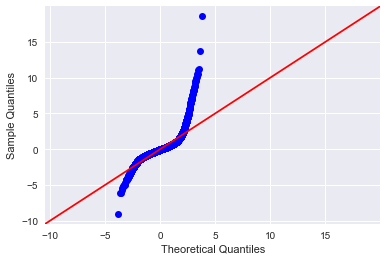

In [44]:
model_resid = model.resid

fig = sm.graphics.qqplot(model_resid, dist=stats.norm, line='45', fit=True)


That is looking a way off normal... may need to log transform numerical categories.

Checking for homoscedasticity

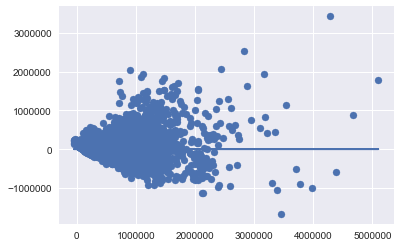

In [45]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [46]:
x_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'condition_4',
 'condition_5',
 'grade_12',
 'grade_13',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98056',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
